## Business Understanding

**Title**

**Overview**
 - Clear statement of scope of work(analysis):
    - "This project analyzes ... which includes [data]"
    - "Descriptive analysis of [primary data fields used] which shows...
    - "The [business looking to buy aircraft] can use this analysis to...

**Business Problem**
- Clear statement of business problem:
    - [business] may be able to...at a low risk of...to help diversify their business portfolio

**Data Understanding**
- Clear explanation of data file, fields used, and why

## Data Preparation

**Read data**
- Review/show field characteristics
- Determine focus of business problem
- Determine most relevant fields to solve business problem

**Clean data**
- Replace column names
- Drop unneccessary columns
- Filter out relevant info
- Add filtered columns
- Replace dataframe

**Feature Engineering**
- Create a feature to analyze risk among relevant aircraft
- Lamda functions?
    - Maybe use time-series data if relevant
- Basic measure of central tendancy calcs for reference

## Data Analysis

**Visualizations**
- Import matplotlib / seaborn
- Analysis Q1 w/ associated plot
- Analysis Q2 w/ associated plot
- Analysis Q3 w/ associated plot

## Conclusions

**Recommendations**
- Include at least 3 recommendations that relate to visualizations

## Next Steps

**Futher Analysis**
- Expand data used in analysis?
- Suggest a model to accomplish something important?
- Suggest risk analysis predictions?

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [45]:

#dtypes = {'column_name_6': 'int64', 'column_name_7': 'float64', 'column_name_28': 'float64'}
aviation = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype={'column_name_6': 'int64', 'column_name_7': 'float64', 'column_name_28': 'float64'})
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

c:\Users\dangr\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [52]:
aviation['Make'].value_counts()

Cessna                  22227
Piper                   12029
CESSNA                   4922
Beech                    4330
PIPER                    2841
                        ...  
PFLUGRADT                   1
D'amico                     1
LUCAS D E/ LUCAS K A        1
BARNES THOMAS A             1
WOODWARD HAROLD L           1
Name: Make, Length: 8237, dtype: int64

In [3]:
aviation['Latitude'] = aviation['Latitude'].astype(str)
aviation['Latitude'].sort_values()

62772    -0.138055
54058    -0.139444
52511    -0.462778
56093        -1.02
61884    -1.267778
           ...    
29631          nan
29630          nan
29629          nan
29637          nan
88888          nan
Name: Latitude, Length: 88889, dtype: object

In [4]:
aviation['Event.Date'].sort_values()

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
88886    2022-12-26
88887    2022-12-26
88884    2022-12-26
88885    2022-12-26
88888    2022-12-29
Name: Event.Date, Length: 88889, dtype: object

In [5]:
plane = aviation.loc[aviation['Aircraft.Category'] == 'Airplane']
plane.sort_values(by = 'Event.Date')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277000000004,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,nan,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,nan,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,nan,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,nan,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022


In [20]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27617 entries, 5 to 88886
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                27617 non-null  object 
 1   Investigation.Type      27617 non-null  object 
 2   Accident.Number         27617 non-null  object 
 3   Event.Date              27617 non-null  object 
 4   Location                27610 non-null  object 
 5   Country                 27610 non-null  object 
 6   Latitude                27617 non-null  object 
 7   Longitude               22083 non-null  object 
 8   Airport.Code            17773 non-null  object 
 9   Airport.Name            18256 non-null  object 
 10  Injury.Severity         26803 non-null  object 
 11  Aircraft.damage         26335 non-null  object 
 12  Aircraft.Category       27617 non-null  object 
 13  Registration.Number     27391 non-null  object 
 14  Make                    27608 non-null

In [26]:
aviation['Event.Year'] = [int(year[:4]) for year in aviation['Event.Date']]
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,nan,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,nan,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922222999999995,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,nan,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,nan,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


In [28]:
aviation['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [34]:
list(aviation['Weather.Condition'].value_counts().index)

['VMC', 'IMC', 'UNK', 'Unk']

In [7]:
list(aviation['Amateur.Built'].value_counts().sort_index())

[80312, 8475]

Removing irrelevant columns:

In [8]:
df = plane.drop(['Latitude', 'Longitude', 'Registration.Number', 'Airport.Code', 'Airport.Name'], axis = 1)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [24]:
#create column with the year of each event
#df['Event.Year'] = [int(year[:4]) for year in df['Event.Date']]
#df.head()

In [10]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,24863.000000,24452.000000,24393.000000,24739.000000,26717.000000,27617.000000
mean,1.158589,0.655529,0.297708,0.254093,6.367145,2009.636275
std,0.407658,5.943002,2.097923,2.895328,31.849418,11.267675
min,0.000000,0.000000,0.000000,0.000000,0.000000,1979.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2017.000000
max,8.000000,295.000000,161.000000,380.000000,588.000000,2022.000000


In [11]:
# find number of entries for each year
df['Event.Year'].value_counts().sort_index()

1979       1
1982    3175
1983      10
1984       7
1985       6
1986       9
1987       5
1988      12
1989       7
1990      21
1991      17
1992       6
1993      10
1994      12
1995      15
1996      12
1997      38
1998      47
1999      43
2000      46
2001      81
2002      88
2003     181
2004     499
2005     696
2006     722
2007     966
2008    1617
2009    1461
2010    1507
2011    1551
2012    1487
2013    1274
2014    1290
2015    1321
2016    1437
2017    1403
2018    1423
2019    1391
2020    1203
2021    1246
2022    1274
Name: Event.Year, dtype: int64

In [12]:
#create a dictionary for years and counts
year = list(df['Event.Year'].value_counts().sort_index().index)
count = list(df['Event.Year'].value_counts().sort_index().values)
year_dict = {year[i]: count[i] for i in range(len(year))}
year_dict

{1979: 1,
 1982: 3175,
 1983: 10,
 1984: 7,
 1985: 6,
 1986: 9,
 1987: 5,
 1988: 12,
 1989: 7,
 1990: 21,
 1991: 17,
 1992: 6,
 1993: 10,
 1994: 12,
 1995: 15,
 1996: 12,
 1997: 38,
 1998: 47,
 1999: 43,
 2000: 46,
 2001: 81,
 2002: 88,
 2003: 181,
 2004: 499,
 2005: 696,
 2006: 722,
 2007: 966,
 2008: 1617,
 2009: 1461,
 2010: 1507,
 2011: 1551,
 2012: 1487,
 2013: 1274,
 2014: 1290,
 2015: 1321,
 2016: 1437,
 2017: 1403,
 2018: 1423,
 2019: 1391,
 2020: 1203,
 2021: 1246,
 2022: 1274}

In [13]:
#show which Event.Years are relevant years
y = 2013
df['Relevant.Year'] = np.where(df['Event.Year'] >= y, True, False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Relevant.Year
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,...,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,False
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,False
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,False
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,...,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982,False
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,...,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982,False


In [14]:
list(df['Amateur.Built'].value_counts().sort_index())

[24417, 3183]

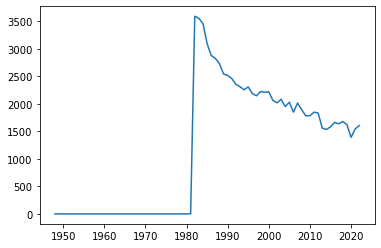

In [27]:
x1 = aviation['Event.Year'].value_counts().sort_index().index
y1 = aviation['Event.Year'].value_counts().sort_index().values

plt.plot(x1, y1)
plt.show()

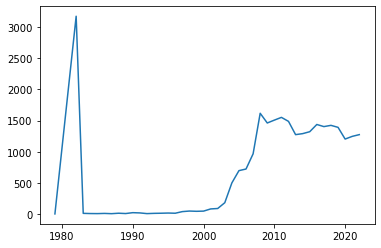

In [23]:
x2 = df['Event.Year'].value_counts().sort_index().index
y2 = df['Event.Year'].value_counts().sort_index().values

plt.plot(x2, y2)
plt.show()

In [36]:
aviation['Weather.Condition'].value_counts().sort_index()

IMC     5976
UNK      856
Unk      262
VMC    77303
Name: Weather.Condition, dtype: int64

In [38]:
df['Purpose.of.flight'].value_counts().sort_index()

ASHO                             6
Aerial Application            1068
Aerial Observation             170
Air Drop                         3
Air Race show                   74
Air Race/show                    7
Banner Tow                      89
Business                       785
Executive/corporate            151
External Load                    1
Ferry                          176
Firefighting                    17
Flight Test                    226
Glider Tow                      35
Instructional                 3212
Other Work Use                 158
PUBS                             3
Personal                     16154
Positioning                    359
Public Aircraft                 43
Public Aircraft - Federal       53
Public Aircraft - Local         12
Public Aircraft - State         24
Skydiving                      166
Unknown                        886
Name: Purpose.of.flight, dtype: int64

In [17]:
df['Engine.Type'].value_counts().sort_index()

Electric               5
Geared Turbofan       12
Reciprocating      20715
Turbo Fan            970
Turbo Jet            158
Turbo Prop          1366
Turbo Shaft           11
UNK                    1
Unknown              153
Name: Engine.Type, dtype: int64

In [37]:
country = list(aviation['Country'].value_counts().sort_index().index)
count2 = list(aviation['Country'].value_counts().sort_index().values)
country_dict = {country[i]: count2[i] for i in range(len(country))}
country_dict

{'ATLANTIC OCEAN': 81,
 'AY': 1,
 'Afghanistan': 14,
 'Albania': 1,
 'Algeria': 2,
 'American Samoa': 41,
 'Angola': 11,
 'Anguilla': 1,
 'Antarctica': 7,
 'Antigua And Barbuda': 2,
 'Antigua and Barbuda': 3,
 'Argentina': 112,
 'Aruba': 2,
 'Australia': 300,
 'Austria': 56,
 'BLOCK 651A': 1,
 'Bahamas': 216,
 'Bahrain': 9,
 'Bangladesh': 8,
 'Barbados': 6,
 'Belarus': 1,
 'Belgium': 38,
 'Belize': 9,
 'Benin': 1,
 'Bermuda': 2,
 'Bolivia': 34,
 'Bosnia And Herzegovina': 1,
 'Bosnia and Herzegovina': 2,
 'Botswana': 2,
 'Brazil': 374,
 'British Virgin Islands': 8,
 'Bulgaria': 5,
 'CARIBBEAN SEA': 13,
 'Cambodia': 1,
 'Cameroon': 4,
 'Canada': 359,
 'Cayenne': 2,
 'Cayman Islands': 7,
 'Central Africa': 17,
 'Central African Republic': 4,
 'Chad': 1,
 'Chile': 55,
 'China': 67,
 'Colombia': 193,
 'Congo': 7,
 'Corsica': 1,
 'Costa Rica': 30,
 "Cote D'ivoire": 2,
 'Croatia': 12,
 'Cuba': 11,
 'Cyprus': 2,
 'Czech Republic': 16,
 "Côte d'Ivoire": 4,
 'Denmark': 34,
 'Dominica': 5,
 'Domi

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27617 entries, 5 to 88886
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                27617 non-null  object 
 1   Investigation.Type      27617 non-null  object 
 2   Accident.Number         27617 non-null  object 
 3   Event.Date              27617 non-null  object 
 4   Location                27610 non-null  object 
 5   Country                 27610 non-null  object 
 6   Injury.Severity         26803 non-null  object 
 7   Aircraft.damage         26335 non-null  object 
 8   Aircraft.Category       27617 non-null  object 
 9   Make                    27608 non-null  object 
 10  Model                   27586 non-null  object 
 11  Amateur.Built           27600 non-null  object 
 12  Number.of.Engines       24863 non-null  float64
 13  Engine.Type             23391 non-null  object 
 14  FAR.Description         27118 non-null

In [54]:

for company in aviation['Make']:

    if 'Airbus' in str(company):
        aviation['Make'].replace(str(company), 'Airbus')
aviation['Make'].value_counts().sort_index()       

107.5 Flying Corporation    1
1200                        1
177MF LLC                   1
1977 Colfer-chan            1
1st Ftr Gp                  1
                           ..
Zukowski                    1
Zwart                       1
de Havilland                9
drone                       1
unknown                     1
Name: Make, Length: 8237, dtype: int64

In [63]:
company_list = []
for company in aviation['Make']:
    company_list.append(company)
company_list_strings = [str(x) for x in company_list]
company_list_strings.sort()
company_list_strings

['107.5 Flying Corporation',
 '1200',
 '177MF LLC',
 '1977 Colfer-chan',
 '1st Ftr Gp',
 '2000 Mccoy',
 '2001 Mcgirl',
 '2003 Nash',
 '2007 Savage Air LLC',
 '2021FX3 LLC',
 '2021FX3 LLC',
 '3XTRIM',
 '5 RIVERS LLC',
 '67 Flying Dutchman',
 '737',
 '737',
 '777',
 '781569 INC',
 '85 Manista',
 'A Pair Of Jacks',
 'A. H. Gettings',
 'A. Le Francois',
 'A. Schleicher GMBH & Co.',
 'AAA AIRCRAFT LLC',
 'AARDEMA ROBERT JOHN',
 'AB SPORTINE AVIACIJA',
 'AB SPORTINE AVIACIJA',
 'AB SPORTINE AVIACIJA',
 'AB Sportine Aviacija',
 'ABBETT GERRY',
 'ABBEY VICTOR',
 'ACKLAND JEFFREY DEAN',
 'ACRO',
 'ADAMS',
 'ADAMS BALLOONS LLC',
 'ADAMS DENNIS ALLEN',
 'ADAMS DONALD L',
 'ADAMS JOHN R JR',
 'ADRIAN GEORGE W',
 'AERMACCHI',
 'AERO ADVENTURE',
 'AERO AT SP ZOO',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMMANDER',
 'AERO COMM

In [53]:
list = [1, 3, 5, 7, 9]
list_string = [str(x) for x in list]
list_string

['1', '3', '5', '7', '9']

In [ ]:
for company in filtered_df['Make']:
    if 'airbus' in str(company):
        filtered_df.loc[filtered_df['Make'] == 

In [ ]:
for company in filtered_df['Make']:
    if 'airbus' in str(company):
        filtered_df['Make'] == 'airbus'